In [26]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

0
1
NVIDIA GeForce GTX 1650 Ti


device(type='cuda', index=0)

### Information Theory Basics

In [27]:
# first I will build the datasets which will be a two dimension array
import numpy as np

p = [[1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0]]
sum_x = np.sum(p, axis=1)
sum_y = np.sum(p, axis=0)

In [28]:
# a. Is H(x|y) = H(y|x)
# we have H(x|y) = -sigma(x)sigma(y)(P(x, y)*log(p(x|y)))
# also H(y|x) = -sigma(x)sigma(y)(P(y, x)*log(P(y|x)))
# loop through every possible x, y and use the formula H(x|y) = -sigma(P(x|y)*log(p(x|y))
# i represent x and j represent y
x_given_y = 0
y_given_x = 0
for j in range(4):
    for i in range(4):
        if(p[i][j]):
            x_given_y -= p[i][j]*np.log2(p[i][j]/sum_y[j])

for i in range(4):
    for j in range(4):
        if p[i][j]:
            y_given_x -= p[i][j]*np.log2(p[i][j]/sum_x[i])
print("a.")
print(f"H(X|Y) = {x_given_y}")
print(f"H(X|Y) = {y_given_x}")
print("we have x_given_y != y_given_x or H(x|y) != H(y|x)")

entropy_x = 0
entropy_y = 0
for i in range(4):
    entropy_x -= sum_x[i]*np.log2(sum_x[i])
    entropy_y -= sum_y[i]*np.log2(sum_y[i])
print("b.")
print(f"H(X) - H(X-Y) = {entropy_x-x_given_y}")
print(f"H(Y) - H(Y|X) = {entropy_y-y_given_x}")
print("we have H(X) - H(X-Y) = H(Y) - H(Y|X)")

mut_info = 0
for i in range(4):
    for j in range(4):
        if p[i][j]: mut_info += p[i][j]*np.log2(p[i][j]/(sum_x[i]*sum_y[j]))
print("c.")
print(f"the mutual information is: I(X, Y) = {mut_info}")

a.
H(X|Y) = 1.625
H(X|Y) = 1.375
we have x_given_y != y_given_x or H(x|y) != H(y|x)
b.
H(X) - H(X-Y) = 0.375
H(Y) - H(Y|X) = 0.375
we have H(X) - H(X-Y) = H(Y) - H(Y|X)
c.
the mutual information is: I(X, Y) = 0.375


### Maximum Likelihood Parameter Estimation

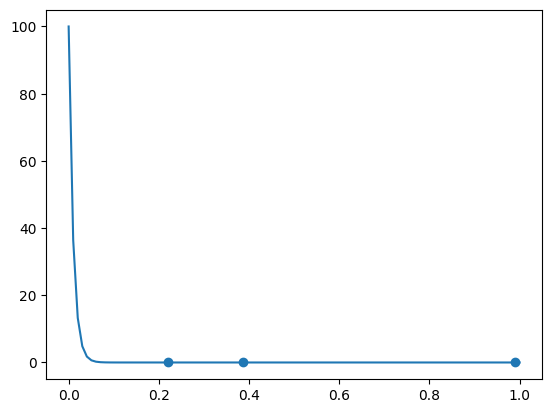

probability defsity function in [0.21948202] seconds: [2.93776584e-08]
probability defsity function in [0.98941161] seconds: [1.07250587e-41]
probability defsity function in [0.38726383] seconds: [1.51825824e-15]


In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# create 1000 points in the exponential distribution for ploting
hyperpara = 100
x = np.linspace(0, 1, 100)
y = [hyperpara * np.exp(-scalar*hyperpara) for scalar in x]
plt.plot(x, y)
sample_x = np.random.rand(3, 1)
sample_y = [hyperpara * np.exp(-scalar*hyperpara) for scalar in sample_x]
plt.scatter(sample_x, sample_y)
plt.show()
for i in range(3):
    print(f"probability defsity function in {sample_x[i]} seconds: {sample_y[i]}")


The goal is to **minimize the negative log-likelihood** of the exponential distribution. We denote the negative log-likelihood as:

-ln(L(lambda)) = -ln(product p(x_i | lambda))

Thus the final equation of negative log-likelihood

-ln(L(lambda)) = -ln(lambda^n * e^{-lambda * sigma(x_i)}) = -n ln(lambda) + lambda * sigma(x_i)


In [30]:
import numpy as np

x = np.random.exponential(1/100, size=1000)

epochs = 1000
para = 100
lr = 3e-4
n = 1000

for epoch in range(epochs):
    gradient = -n/para + para*np.sum(x)
    para -= lr * gradient

print(f"Final parameter value: {para:.4f}")


Final parameter value: 11.1999


### Linear Regression and SGD

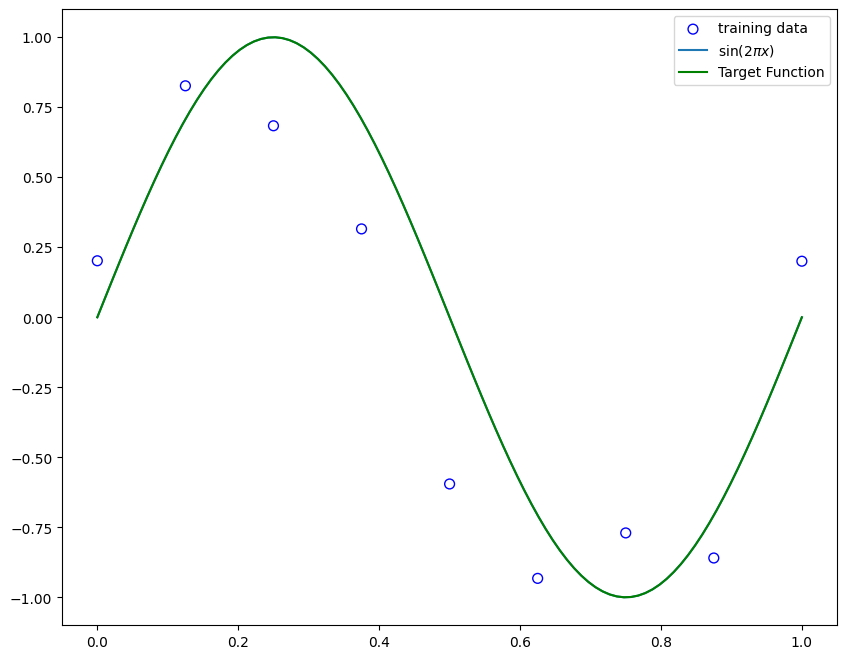

In [31]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# 9 datapoints
m = 9
x_train, y_train = create_toy_data(sinusoidal, m, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

Apply L2-norm regularized into the model

-> L = L(MSE) + L(Penalty) = 1/2 * sigma((w_i*x_i - y_i)^2) + lamda/2 ||w||^2

-> gradient = dL/dx = sigma((w_i*x_i - y_i)*x_i) + lambda * ||w||

final weight: [ 0.54216733  0.67352495 -4.26268113 -1.46641384  0.64400589  1.45866848
  1.43758937  1.00037386  0.40560857 -0.20881748]


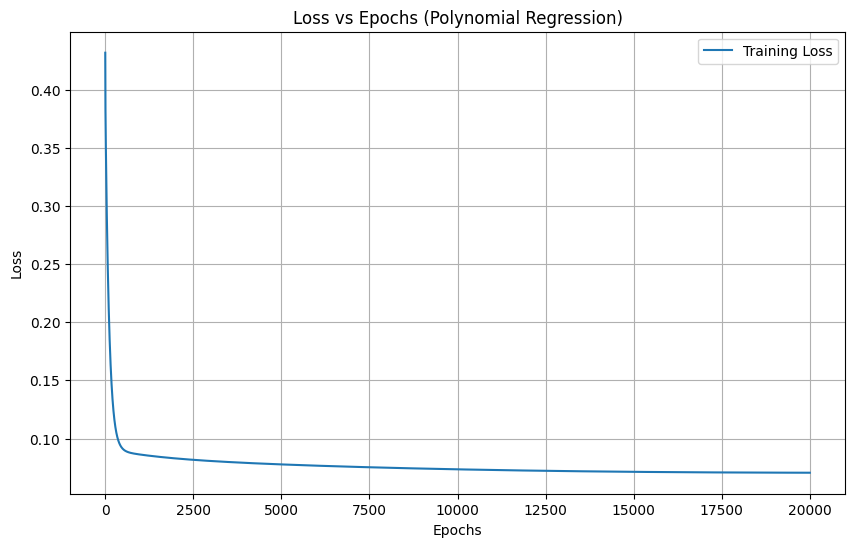

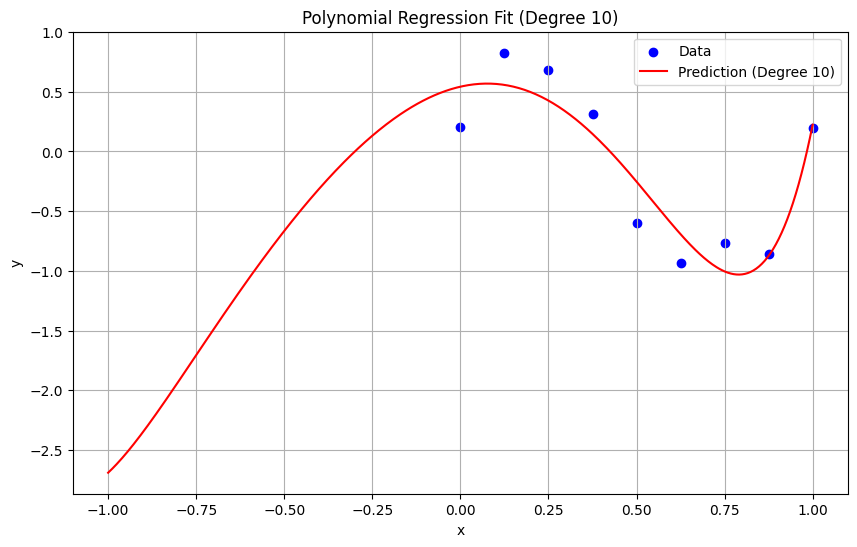

In [32]:
import matplotlib.pyplot as plt

def l2_sgd(degree, lr, epochs, x_train, y_train, lambda_reg):
    loss = []
    # add more feature into x_train to create polynomial regression
    x_transform = np.ones((m, 1))
    for j in range(degree + 1):
        if j != 0:
            x_pow = np.power(x_train, j)
            x_transform = np.append(x_transform, x_pow.reshape(-1, 1), axis=1)

    # weight intialization
    theta = np.zeros(degree+1) # include bias
    for epoch in range(epochs):
        y_pred = np.dot(x_transform, theta)
        error = y_pred - y_train
        gradient = np.dot(x_transform.T, error) + lambda_reg * theta
        theta -= lr*gradient
        loss.append(np.mean(error**2) + lambda_reg / 2 * np.sum(theta**2))
    return theta, loss


#hyper parameter
epochs = 20000
lr = 0.01
lambda_reg = 1e-3
theta_final, loss_history = l2_sgd(lr=lr, epochs=epochs, lambda_reg=lambda_reg, x_train=x_train, y_train=y_train, degree=m)

print("final weight:", theta_final)

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="Training Loss")
plt.title("Loss vs Epochs (Polynomial Regression)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

X_range = np.linspace(-1, 1, 500).reshape(-1, 1)
X_range_poly = np.hstack([X_range**i for i in range(m + 1)])
y_pred = X_range_poly.dot(theta_final)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Data')
plt.plot(X_range, y_pred, color='red', label='Prediction (Degree 10)')
plt.title("Polynomial Regression Fit (Degree 10)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
